
Test for an education/gender interaction in wages
==================================================

Wages depend mostly on education. Here we investigate how this dependence
is related to gender: not only does gender create an offset in wages, it
also seems that wages increase more with education for males than
females.

Does our data support this last hypothesis? We will test this using
statsmodels' formulas
(http://statsmodels.sourceforge.net/stable/example_formulas.html).




In [2]:
import pandas as pd
import numpy as np
import seaborn
import statsmodels.formula.api as sm

### Load and massage the data



In [3]:
# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pd.read_csv('wages85.csv')

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['Wage'] = np.log10(data['Wage'])
data.head()

,Education,South,Sex,Experience,Union,Wage,Age,Race,Occupation,Sector,Married
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


In [4]:
data.describe()

,Education,South,Sex,Experience,Union,Wage,Age,Race,Occupation,Sector,Married
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.00000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,0.894294,36.833333,2.698502,4.14794,0.275281,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,0.229196,11.726573,0.679999,1.65580,0.538453,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.00000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,0.720159,28.000000,3.000000,3.00000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,0.890980,35.000000,3.000000,4.00000,0.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,1.051153,44.000000,3.000000,6.00000,0.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,1.648360,64.000000,3.000000,6.00000,2.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
Education     534 non-null int64
South         534 non-null int64
Sex           534 non-null int64
Experience    534 non-null int64
Union         534 non-null int64
Wage          534 non-null float64
Age           534 non-null int64
Race          534 non-null int64
Occupation    534 non-null int64
Sector        534 non-null int64
Married       534 non-null int64
dtypes: float64(1), int64(10)
memory usage: 46.0 KB


### Simple plotting



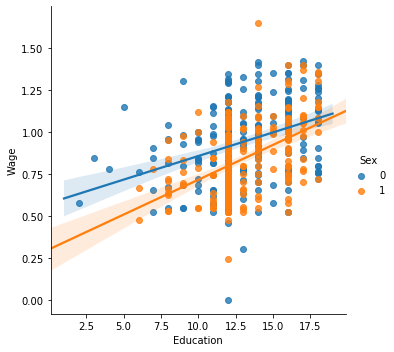

In [6]:
# Plot 2 linear fits for male and female.
seaborn.lmplot(y='Wage', x='Education', hue='Sex', data=data)

### Statistical analysis



In [7]:
# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula='Wage ~ Education + Sex', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.01e-25
Time:                        09:57:16   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5060      0.046     10.979      0.0

In [10]:
result.params

Intercept    0.506037
Education    0.033375
Sex         -0.100785
dtype: float64

In [11]:
result.params[0]

0.5060365919229228

The plots above highlight that there is not only a different offset in
wage but also a different slope

We need to model this using an interaction



In [12]:
result = sm.ols(formula='Wage ~ Education + Sex + Education * Sex',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.94e-25
Time:                        10:00:21   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861

Looking at the p-value of the interaction of gender and education, the
data does not support the hypothesis that education benefits males
more than female (p-value > 0.05).

